### CITS5508 Machine Learning Lab Sheet 5, Semester 1 2021
#### Student : Daniel Santosa (19315466)

In [5]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from data_loader import DataLoader
import tensorflow.keras as keras
import sklearn as sk
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score

import math
import random

In [8]:
# According to the CIFAR-10 website, the training set is split into five batches
# stored in fives files. Each colour image has dimensions equal to 32 x 32 x 3. There
# are 10 classes.
image_width, image_height, image_Nchannels = 32, 32, 3
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# The default values of all the arguments of the load_batch function have been
# set for the CIFAR-10 dataset.
X_train, y_train = DataLoader.load_batch('data_batch')
X_test, y_test = DataLoader.load_batch('test_batch', Nbatches=1)

In [9]:
# You need to split the training set to form a validation set. The original
# training set would become smaller.

print('X_test.shape =', X_test.shape, 'data type:', X_test.dtype)
print('y_test.shape =', y_test.shape, 'data type:', y_test.dtype)

X_test.shape = (10000, 32, 32, 3) data type: float32
y_test.shape = (10000,) data type: uint8


### Task (i) Data Preparation and Visualisation

In [10]:
from sklearn.model_selection import train_test_split

#split the X_train data into 80% training set and 20% validation set
X_train, X_val = train_test_split(X_train, test_size=0.20, random_state=42)

# split the labels data into 80% training set and 20% validation set
y_train, y_val = train_test_split(y_train, test_size=0.20, random_state=42)

### Task (ii) Display 20 Randomly Sampled Images from Test, Train, and Validation Sets

20 randomly selected test images


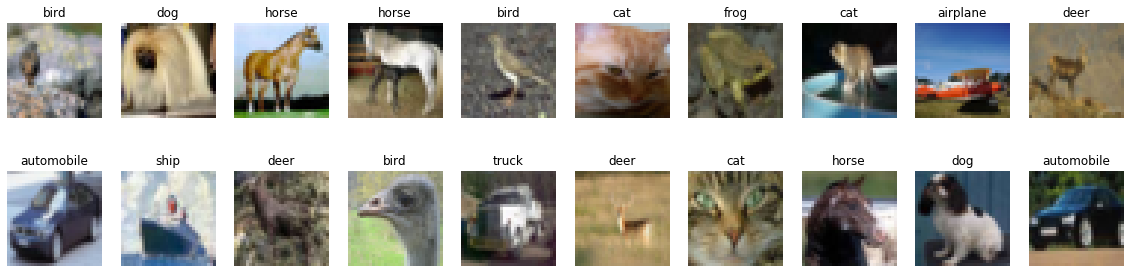

In [6]:
# Function to select 20 random images
def rand_image_pred0(x, y_true):
    i = random.randint(0,len(x)-1)
    return (x[i], y_true[i])

# Function to show & plot the 20 random images
def plot_sample_images0(X_test, y_test, rows=2, cols=10, figsize=(20,5)):       
    plt.figure(figsize=figsize)
    for i in range(rows * cols):
        image, tclass = rand_image_pred0(X_test, y_test)
        ax = plt.subplot(rows,cols,i+1)
        plt.imshow(image)
        plt.axis('off')
        ax.set_title(f"{class_names[tclass]}")
    plt.show()

print("20 randomly selected test images")    
plot_sample_images0(X_test, y_test)

20 randomly selected train images


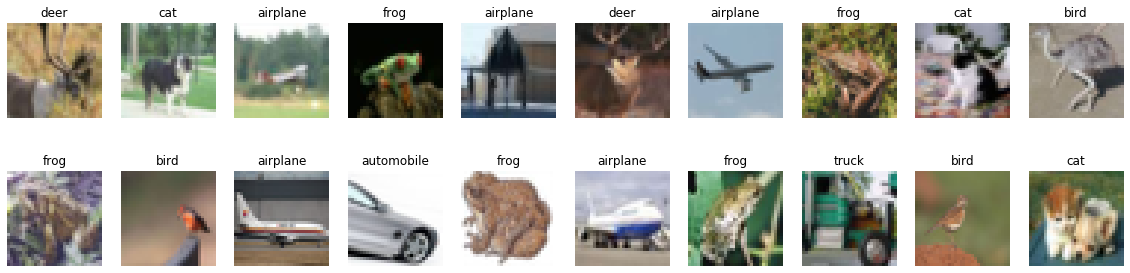

In [6]:
print("20 randomly selected train images")
plot_sample_images(X_train, y_train)

20 randomly selected validation images


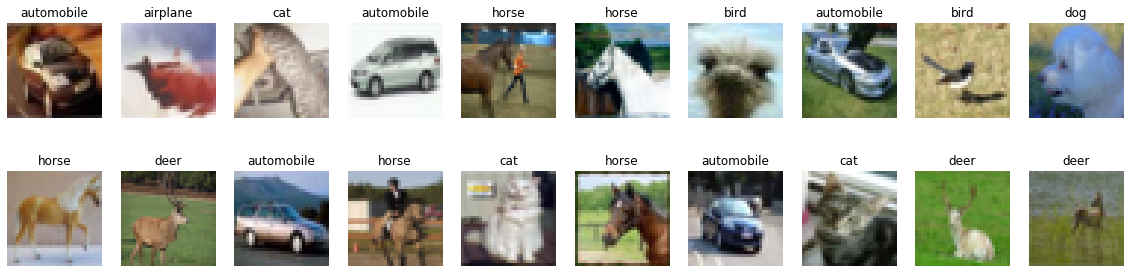

In [7]:
print("20 randomly selected validation images")
plot_sample_images(X_val, y_val)

### Task (iii) Implementation Of An MLP

### MLP(a) Hyperparameters  ,    (b) Architecture    ,    (c)  Training and Testing

A function was created with inputs : connection weight initialisation, learning rate scheduling, and dropout rate

From this function the hyperparameter tuning process can be experimented easily by changing the settings for all of the 
following :

    • connection weight initialisation;
    
    • learning rate scheduling (including a learning rate calculation function and call back);
    
    • dropout rate.
    
I have chosen to go through manually all the combinations for connection weight initialisation, learning rate scheduling, and dropout rate so that I can gain a better understanding myself of what hyperparameters affect the performance accuracy.
    
### Manual Hyperparameter tuning steps : 

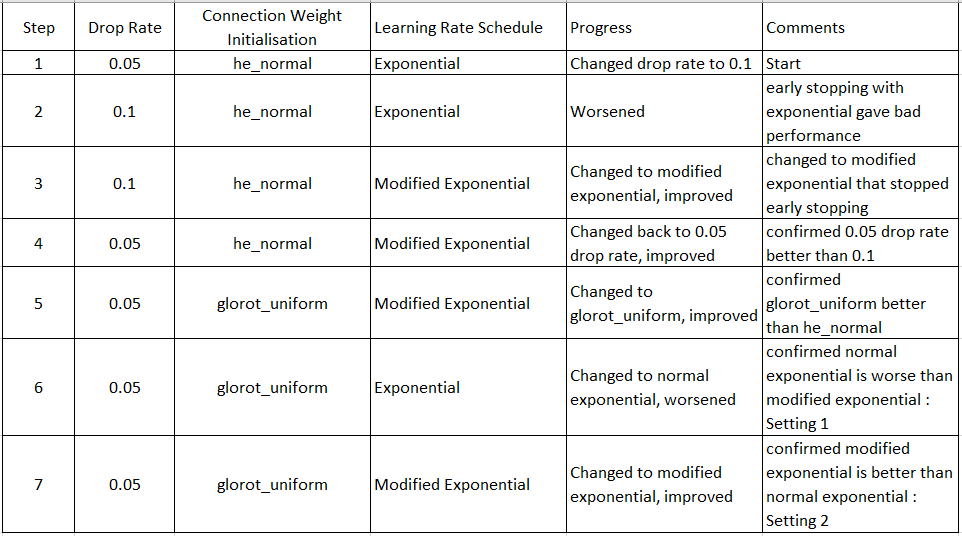

1. First tried drop rate : 0.05, connection weight initialisation : he_normal , learning schedule : exponential 


2. Then only changed drop rate to : 0.1, connection weight initilisation : same he_normal, learning schedule : same exponential and found early stopping stopped at 13 epochs with accuracy worse than drop rate 0.05 because of early stopping.


3. Then only changed the learning schedule to constant for first 10 epochs then exponential after 10 epochs, with drop rate same at 0.1, and connection weight initialisation same he_normal, and found no more early stopping and improved accuracy.


4. Then just changed drop rate back to 0.05 with all other hyperparameters the same and found slight improvement of accuracy. So this confirmed that a drop rate of 0.05 is better compared to 0.1.


5. Then only changed the connection weight initialisation to glorot_uniform from he_normal and found better accuracy. The learning rate schedule : constant for first 10 epochs then exponential after 10 epochs and drop rate : 0.05 remained the same from step 4. This confirmed that for weight initialisation glorot_uniform was better compared to he_normal.


6. At this point it has been confirmed that a drop rate of 0.05 and connection weight initialisation : glorot_uniform were better. Then I tried 2 settings with hyperparameters drop rate : 0.05, connection weight initialisation : glorot_uniform unchanged and only changed the learning rate scheduling. From this I found out that the learning rate schedule : constant for first 10 epochs then exponential afterwards produced better performance accuracy and this is the final best setting I chose also shown in Setting 2 below.


7. I made the final 2 settings to compare the last combination of settings from Step 6 above as shown below :

    Setting 1  :      
                
                connection weight initialisation =  glorot uniform initialisation
                  
                learning rate schedule           =  exponential decay 
                  
                drop rate                        =  0.05
                
                performance accuracy             =  0.5022 in 68 epochs (early stopping)
                  
    Setting 2  :      
                
                connection weight initialisation =  glorot uniform initialisation
                  
                learning rate schedule           =  constant for first 10 epochs then exponential decay after 10 epochs
                  
                drop rate                        =  0.05
                
                performance accuracy             =  0.5338 in 65 epochs (early stopping)
                
As shown in the training accuracy performance results below, the Setting 1 is able to achieve a performance accuracy of 0.5022 in 68 epochs while the best Setting 2 is able to achieve a performance accuracy of 0.5338 in 65 epochs. This shows that just by varying the training rate schedule an increase in accuracy performance and also a decrease in training epochs can be achieved.

### MLP Model Architecture

1. input layer which is a flattened 32 x 32 image input layer with 3 RGB color channels
2. the first hidden layer has 256 perceptrons with activation function 'relu'
3. the second hidden layer has 128 perceptrons with activation function 'relu'
4. the output layer has 10 perceptrons for the 10 classes with activation function 'linear'

### MLP Hyperparameter Settings

Two possible settings for the hyperparameters : connection weight initialisation, learning rate scheduling, and dropout rate have been trained and their classification accuracy and F1 scores are shown below. There is a difference of about 3% between the two settings in accuracy. The confusion matrix of the best Setting 2 has been shown.

#### Connection Weight Initialisations
Glorot and He weights initialisations were used in order to initialise the perceptron weight in order to reduce the problem of vanishing gradients. 

Glorot Initialisation : uses the normal distribution with mean 0 and variance $\sigma^{2} = [\frac{1}{fan_{avg}}]$

He Initialisation : Provides similar weight initialisation strategies for RELU activation function.

Using Glorot Initialisation gave better performance accuracy for the MLP model than He Initialisation.

#### Learning Rate Scheduling
The learning rate for Setting 1 decreased exponentially from the first epoch until the early stopping callback, and this took more epochs to train with 68 epochs. The learning rate for Setting 2 was constant for the first 10 epochs then reduced exponentially after the 10th epoch, this learning rate took slightly less, 65 epochs before early stopping.

Using the modified learning rate for Setting 2 gave better performance accuracy for the MLP model than exponential learning rate.

#### Drop Out Rate
A smaller drop out rate of 0.05 gave better accuracy performance than 0.1 and was used in both Setting 1 & 2.

### MLP Training and Testing
Early stopping was used as a callback to interrupt and stop training when no decrease is observed on the validation losses for 5 epochs. 

The SGD class optimizer is used which is the stochastic gradient descent with momentum and this gave better MLP performance than Adam optimizer.

The loss function used is SparseCategoricalCrossentropy which computes the crossentropy loss between the labels and predictions.

### The function below NEEDS to be run

In [2]:
# Function to create the MLP model, train, and show accuracy
def train_mlp_model(connection_weight_init, learning_rate_sched, dropout_rate):
    
    # the MLP model architecture with 2 hidden layers    
    mlp_model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32, 32, 3)),
        keras.layers.Dropout(rate=dropout_rate),
        keras.layers.Dense(256, activation='relu', kernel_initializer=connection_weight_init),
        keras.layers.Dropout(rate=dropout_rate),
        keras.layers.Dense(128, activation='relu', kernel_initializer=connection_weight_init),
        keras.layers.Dropout(rate=dropout_rate),
        keras.layers.Dense(10, activation='linear', kernel_initializer=connection_weight_init)
    ])
    
    checkpoint_filepath = './Santosa_Daniel-MLP/'
    
    # Early stopping through callback has been incorporated
    early_stopping_cb = keras.callbacks.EarlyStopping('val_loss', patience=5, restore_best_weights=True)
    
    # Best model checkpoint through callback has been incorporated
    best_model_cb = keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,save_best_only=True)
    
    callbacks = [early_stopping_cb,learning_rate_sched, best_model_cb]

    # Compile model and show summary of architecture
    mlp_model.compile(optimizer='sgd', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
    mlp_model.summary()
    
    # Fit and train the MLP model
    print("Training MLP network:")
    mlp_history = mlp_model.fit(X_train, y_train, epochs=100, callbacks=callbacks, validation_data=(X_val,y_val),batch_size=32)

    # Print the training and accuracy of MLP model
    print(f"Accuracy: {mlp_model.evaluate(X_test, y_test, verbose=0)[1]:.4f}\n")
    mlp_y_pred  = np.array([np.argmax(x) for x in mlp_model.predict(X_test)])
    return mlp_y_pred

### First Setting For MLP Hyperparameter Tuning

In [45]:
# # learning rate scheduler is exponential with callback
# def exponential_decay(lr0, s):
#     def exp_decay_fn(epoch):
#         return lr0 * 0.1**(epoch / s)
#     return exp_decay_fn

# my_exp_decay_fn = exponential_decay(lr0=0.01, s=20)

# learning_schedule_cb = keras.callbacks.LearningRateScheduler(my_exp_decay_fn)

# cwi = 'glorot_uniform'           #  connection weight initialiser he initialisation
# ls = learning_schedule_cb       #  learning rate scheduling exponential decay
# dr = 0.05                       #  drop rate 0.1

# mlp_y_pred_set1 = train_mlp_model(cwi, ls, dr)

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_22 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dropout_64 (Dropout)         (None, 3072)              0         
_________________________________________________________________
dense_64 (Dense)             (None, 256)               786688    
_________________________________________________________________
dropout_65 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_65 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_66 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 10)              

40000/40000 [==============================] - 10s 255us/sample - loss: 1.3810 - accuracy: 0.5127 - val_loss: 1.4224 - val_accuracy: 0.4947
Epoch 60/100
40000/40000 [==============================] - 10s 253us/sample - loss: 1.3798 - accuracy: 0.5127 - val_loss: 1.4225 - val_accuracy: 0.4943
Epoch 61/100
40000/40000 [==============================] - 10s 248us/sample - loss: 1.3797 - accuracy: 0.5135 - val_loss: 1.4226 - val_accuracy: 0.4944
Epoch 62/100
40000/40000 [==============================] - 10s 240us/sample - loss: 1.3838 - accuracy: 0.5107 - val_loss: 1.4227 - val_accuracy: 0.4942
Epoch 63/100
40000/40000 [==============================] - 10s 253us/sample - loss: 1.3811 - accuracy: 0.5110 - val_loss: 1.4224 - val_accuracy: 0.4950
Epoch 64/100
40000/40000 [==============================] - 9s 237us/sample - loss: 1.3794 - accuracy: 0.5149 - val_loss: 1.4225 - val_accuracy: 0.4946
Epoch 65/100
40000/40000 [==============================] - 9s 236us/sample - loss: 1.3793 - acc

In [70]:
# print("Per class precision and recall metrics:")
# print(sk.metrics.classification_report(y_test, mlp_y_pred_set1, target_names=class_names))

Per class precision and recall metrics:
              precision    recall  f1-score   support

    airplane       0.57      0.57      0.57      1000
  automobile       0.62      0.63      0.62      1000
        bird       0.40      0.35      0.37      1000
         cat       0.36      0.33      0.34      1000
        deer       0.42      0.40      0.41      1000
         dog       0.43      0.34      0.38      1000
        frog       0.49      0.64      0.55      1000
       horse       0.55      0.56      0.55      1000
        ship       0.58      0.68      0.62      1000
       truck       0.55      0.53      0.54      1000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



### Second Setting For MLP Hyperparameter Tuning

In [46]:
# # learning rate scheduler is constant below 10 epochs and exponential after 10 epochs with callback
# def scheduler(epoch, lr):
#    if epoch < 10:
#      return lr
#    else:
#      return lr * math.exp(-0.1)
# learning_schedule_cb = keras.callbacks.LearningRateScheduler(scheduler)

# cwi = 'glorot_uniform'        #  connection weight initialiser he initialisation
# ls = learning_schedule_cb     #  constant then learning rate scheduling exponential decay after 10 epochs
# dr = 0.05                     #  drop rate of 0.05

# mlp_y_pred_set2 = train_mlp_model(cwi, ls, dr)

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_23 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dropout_67 (Dropout)         (None, 3072)              0         
_________________________________________________________________
dense_67 (Dense)             (None, 256)               786688    
_________________________________________________________________
dropout_68 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_68 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_69 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_69 (Dense)             (None, 10)              

40000/40000 [==============================] - 14s 362us/sample - loss: 1.2724 - accuracy: 0.5497 - val_loss: 1.3623 - val_accuracy: 0.5196
Epoch 26/100
40000/40000 [==============================] - 11s 275us/sample - loss: 1.2659 - accuracy: 0.5529 - val_loss: 1.3575 - val_accuracy: 0.5202
Epoch 27/100
40000/40000 [==============================] - 10s 262us/sample - loss: 1.2610 - accuracy: 0.5548 - val_loss: 1.3555 - val_accuracy: 0.5191
Epoch 28/100
40000/40000 [==============================] - 11s 265us/sample - loss: 1.2576 - accuracy: 0.5563 - val_loss: 1.3526 - val_accuracy: 0.5225
Epoch 29/100
40000/40000 [==============================] - 10s 243us/sample - loss: 1.2536 - accuracy: 0.5549 - val_loss: 1.3537 - val_accuracy: 0.5193
Epoch 30/100
40000/40000 [==============================] - 10s 260us/sample - loss: 1.2460 - accuracy: 0.5617 - val_loss: 1.3526 - val_accuracy: 0.5217
Epoch 31/100
40000/40000 [==============================] - 11s 266us/sample - loss: 1.2457 - a

Epoch 59/100
40000/40000 [==============================] - 11s 264us/sample - loss: 1.2071 - accuracy: 0.5757 - val_loss: 1.3347 - val_accuracy: 0.5291
Epoch 60/100
40000/40000 [==============================] - 11s 266us/sample - loss: 1.2123 - accuracy: 0.5690 - val_loss: 1.3344 - val_accuracy: 0.5295
Epoch 61/100
40000/40000 [==============================] - 10s 252us/sample - loss: 1.2104 - accuracy: 0.5738 - val_loss: 1.3351 - val_accuracy: 0.5295
Epoch 62/100
40000/40000 [==============================] - 10s 261us/sample - loss: 1.2059 - accuracy: 0.5735 - val_loss: 1.3348 - val_accuracy: 0.5302
Epoch 63/100
40000/40000 [==============================] - 10s 256us/sample - loss: 1.2071 - accuracy: 0.5755 - val_loss: 1.3357 - val_accuracy: 0.5302
Epoch 64/100
40000/40000 [==============================] - 10s 259us/sample - loss: 1.2103 - accuracy: 0.5694 - val_loss: 1.3352 - val_accuracy: 0.5297
Epoch 65/100
40000/40000 [==============================] - 10s 253us/sample - los

### MLP (d) Classification Results

The hyperparameter settings for Setting 2 had better performance accuracy than Setting 1 by about 3% and is shown as the confusion matrix below and 10 randomly selected correct and incorrect classification images are shown for Setting 2 label predictions.

The MLP model does not perform well for the CIFAR-10 image classification.

The Setting 2 MLP network was able to achieve an accuracy of about 53.38%. 

The performance of the MLP model is shown below that indicates the precision, recall, and f1 scores for each class label.

In [47]:
# print("Per class precision and recall metrics:")
# print(sk.metrics.classification_report(y_test, mlp_y_pred_set2, target_names=class_names))

Per class precision and recall metrics:
              precision    recall  f1-score   support

    airplane       0.59      0.60      0.59      1000
  automobile       0.63      0.65      0.64      1000
        bird       0.44      0.38      0.41      1000
         cat       0.38      0.33      0.35      1000
        deer       0.46      0.44      0.45      1000
         dog       0.46      0.40      0.43      1000
        frog       0.52      0.66      0.58      1000
       horse       0.60      0.60      0.60      1000
        ship       0.62      0.68      0.65      1000
       truck       0.59      0.60      0.59      1000

    accuracy                           0.53     10000
   macro avg       0.53      0.53      0.53     10000
weighted avg       0.53      0.53      0.53     10000



### The function below NEEDS to be run

In [11]:
def plot_confusion_matrix(y_true, y_pred,
                          display_labels=class_names,
                          xticks_rotation='vertical',
                          cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
    fig, ax = plt.subplots(1, figsize=(10,8))
    disp.plot(cmap=cmap, ax=ax, xticks_rotation=xticks_rotation)
    # set limit of the colorbar [0,1]
    disp.im_.set_clim(0, 1)

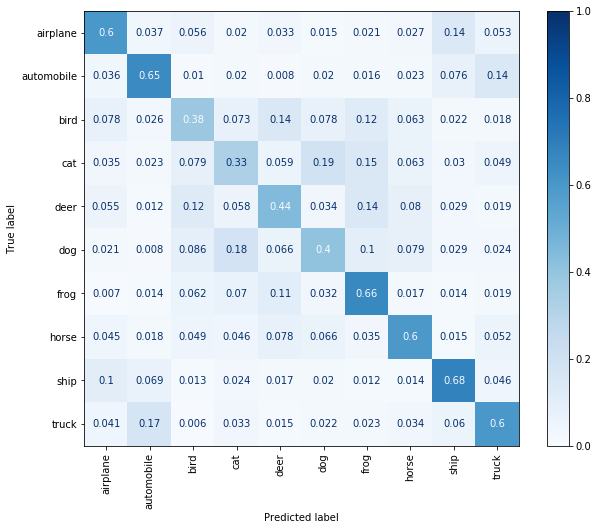

In [49]:
# plot_confusion_matrix(y_test, mlp_y_pred_set2)

### Confusion Matrix

From the confusion matrix the highest missclassification probability of 0.18 was between missclassification of a dog and cat. This may be due to the general shape of dogs and cats are very similar so the model wasn't able to distinguish between dogs and cats very well. For animals, the model was most correct in classifying frogs. 

### Classification Of Images
Generally the model found it easier to classify objects than animals with probability for object classifications higher than 0.5 with the highest being ship at 0.68. While for most animals the classification of being correct was generally less than 0.5 except for horse 0.6 and frog 0.66.

### The function below NEEDS to be run

In [12]:
def get_rand_image_pred(x, y_true, y_pred, correct=True):
    i = random.randint(0,len(x)-1)
    if (y_true[i] == y_pred[i]) == correct:
        return (x[i], y_true[i], y_pred[i])
    else:
        return get_rand_image_pred(x, y_true, y_pred, correct)

def plot_sample_images(X_test, y_test, y_pred,
                       correct=True, rows=2, cols=5, figsize=(10,5)):
    correctly = "correctly" if correct else "incorrectly"
    print(f"{rows * cols} randomly selected {correctly} predicted images")
    plt.figure(figsize=figsize)
    for i in range(rows * cols):
        image, tclass, pclass = get_rand_image_pred(X_test, y_test, y_pred, correct)
        ax = plt.subplot(rows,cols,i+1)
        plt.imshow(image)
        plt.axis('off')
        if correct:
            ax.set_title(f"{class_names[pclass]}")
        else:
            ax.set_title(f"pred: {class_names[pclass]}\ntrue: {class_names[tclass]}")
    plt.show()

10 randomly selected correctly predicted images


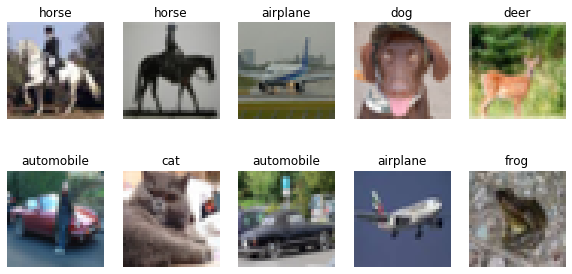

10 randomly selected incorrectly predicted images


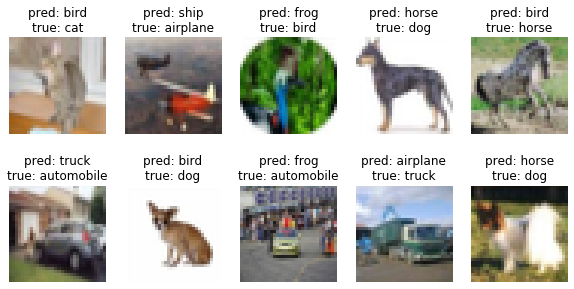

In [51]:
# plot_sample_images(X_test, y_test, mlp_y_pred_set2, correct=True)
# plot_sample_images(X_test, y_test, mlp_y_pred_set2, correct=False)

From the incorrectly predicted images below are some of the images explanations why the prediction was incorrect : 

Images = [row number, column number]

[1,4] = This type of dog has similar features as a horse this may be why it was missclassified as a horse.

[2,1] = For automobiles the MLP model gave the most missclassifications as truck as they have similar features.

[1,3] = This photo has been cropped which may be a major cause for this missclassification.

The MLP model gave misspredictions for similarly featured animals like cats & dogs, deer & horses and for similarly featured objects like automobile and truck.

### Task (iv) Implementation of a CNN

### CNN (a) Hyperparameters   ,  CNN (b)  Architecture  ,  CNN (c) Training And Testing

A function was created with inputs : kernel size, number of kernels, and activation function

From this function the hyperparameter tuning process can be experimented easily by changing the settings for all of the 
following :

    • number of kernels,
    
    • kernel size,
    
    • activation function

I have chosen to go through manually all the combinations for kernel size, number of kernels, and activation function so that I can gain a better understanding myself of what hyperparameters affect the performance accuracy.
    
### Manual Hyperparameter tuning steps : 

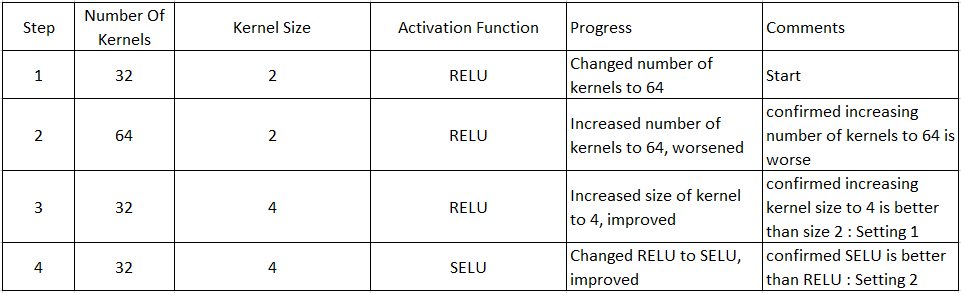

1. First tried kernel number : 32, kernel size : 2 , activation function : RELU.

2. Then I tried only increasing the kernel number : 64, with same kernel size : 2 , and activation function : RELU staying the same. This worsened accuracy performance. This confirms that number of kernels was better at 32 than 64.

3. Then I changed kernel number back to 32, and increased kernel size : 4 , with same activation function RELU. This improved the accuracy performance. This confirms that kernel size is better at 4 than 2.

4. The final setting is kernel number : 32 , kernel size : 4 , with only the activation function changed to SELU from RELU. This improved the accuracy performance. This confirmed that SELU is better than RELU.

5. I made the final 2 settings to compare the last combination of settings from Step 4 above as shown below :

     Setting 1  :      
                             
                  number of kernels       =  32
                  
                  kernel size             =  4
                  
                  activation function     =  RELU activation function
                  
                  performance accuracy    =  0.7388 in 18 epochs (early stopping)
                  
     Setting 2  :      
                             
                  number of kernels       =  32
                  
                  kernel size             =  4
                  
                  activation function     =  SELU activation function
                  
                  performance accuracy    =  0.7525 in 65 epochs (early stopping)
                
As shown in the training accuracy performance results below, the Setting 1 is able to achieve a performance accuracy of 0.7388 in 18 epochs while the best Setting 2 is able to achieve a performance accuracy of 0.7525 in 65 epochs. An improvement was gained in the final Setting 2 from changing the activation function from RELU to SELU.
    
### CNN Model Architecture

1. an input layer of 32 x 32 image with 3 RGB color channels
2. two max pooling layers using 2 x 2 kernel
3. two convolutional layers are used where kernel size and number of kernels can be set, the second convolutional layer has twice the number of kernels as the first layer
4. after each convolutional layers are created they are initialised with batch normalisation to prevent vanishing/ exploding gradients
5. the final layer has a dropout rate of 0.2 applied
6. the output layer has 10 outputs for each class with 'linear' activation function

### CNN Hyperparameter Settings

Two possible settings for the hyperparameters : kernel size, number of kernels, and activation function have been trained and their classification accuracy and F1 scores are shown below. Setting 2 has better classification accuracy and F1 performance than setting 1. There is a difference of about 1% between the two settings in accuracy. 

The confusion matrix of the best Setting 2 has been shown below.

#### Activation Function
For the two settings, Setting 2 with activation function SELU performed better than RELU. Using SELU prevents the problem known as "dying RELUs" when neurons stop outputting anything other than 0 because the inputs are negative. 

#### Number Kernels and Kernel Size
The accuracy of the model was better using less kernels 32 than 64 and with a larger size kernal of 4 than 2. Using less kernels helps the model be able to distinguish between more detailed features in the photos and by being able to distinguish more detailed features the model is able to better classify the photos better. 
Training with less kernels, SELU, and a larger kernel size took longer to train because more computations are involved. Setting 2 also took more epochs to train before the validation set stopped improving which was 18 epochs for setting 1 compared to 65 epochs for Setting 2.


### CNN Training and Testing
Early stopping was used as a callback to interrupt and stop training when no decrease is observed on the validation loss for 5 epochs.

The RMSProp algorithm is used as the optimizer, instead of a momentum vector m it uses a vector s. RMSProp was the preferred optimization algorithm before Adam optimization.

The loss function used is SparseCategoricalCrossentropy which computes the crossentropy loss between the labels and predictions.

### The function below NEEDS to be run

In [13]:
def train_cnn_model(kernel_size, number_kernels, activation_function):
    conv_args = {
        'kernel_size': kernel_size,
        'activation': activation_function,
        'padding': 'same',
        'kernel_initializer':'glorot_uniform'
    }

    # CNN model architecture with 2 convolutional layers, 2 pooling layers, and batch normalisation
    cnn_model = keras.Sequential([
        keras.layers.Conv2D(kernels, **conv_args, input_shape=(32, 32, 3)),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPool2D(2),
        keras.layers.Conv2D(kernels * 2, **conv_args),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPool2D(2),
        keras.layers.Flatten(),
        keras.layers.Dropout(rate=0.05),
        keras.layers.Dense(10, activation='linear')
    ])

    # Show summary of architecture
    cnn_model.summary()

    # Compile model and show summary of architecture
    cnn_model.compile(optimizer='rmsprop',
                  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    checkpoint_filepath = './Santosa_Daniel-CNN/'

    def scheduler(epoch, lr):
       if epoch < 10:
         return lr
       else:
         return lr * math.exp(-0.1)
    learning_schedule_cb = keras.callbacks.LearningRateScheduler(scheduler)

    # Early stopping through callback has been incorporated
    early_stopping_cb = keras.callbacks.EarlyStopping('val_loss', patience=5, restore_best_weights=True)
    
    # Best model checkpoint through callback has been incorporated
    best_model_cb = keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_best_only=True)

    callbacks = [best_model_cb,early_stopping_cb,learning_schedule_cb]
    
    # Fit and train the CNN model
    print("Training CNN network:")
    cnn_history = cnn_model.fit(X_train, y_train, epochs=11, callbacks=callbacks, validation_data=(X_val,y_val),
                                batch_size=64)
    print(f"Accuracy: {cnn_model.evaluate(X_test,y_test,verbose=0)[1]:.4f}")    
    # Print the training and accuracy of the CNN model
    cnn_y_pred = np.array([np.argmax(x) for x in cnn_model.predict(X_test)])
    return cnn_y_pred

### First Setting For CNN Hyperparameter Tuning

In [63]:
# # first settings for CNN hyperparameter tuning
# kernels = 32          # number of kernels
# kernel_size = 4       # kernel size is 2 x 2 with stride 2
# activation_function = 'relu'     # activation function RELU

# cnn_y_pred_set1 = train_cnn_model(kernel_size, kernels, activation_function)

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        1568      
_________________________________________________________________
batch_normalization_12 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 64)        32832     
_________________________________________________________________
batch_normalization_13 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_29 (Flatten)         (None, 4096)            

In [64]:
# print("Per class precision and recall metrics:")
# print(sk.metrics.classification_report(y_test, cnn_y_pred_set1, target_names=class_names))

Per class precision and recall metrics:
              precision    recall  f1-score   support

    airplane       0.70      0.81      0.75      1000
  automobile       0.86      0.82      0.84      1000
        bird       0.64      0.63      0.64      1000
         cat       0.59      0.54      0.56      1000
        deer       0.62      0.77      0.69      1000
         dog       0.74      0.58      0.65      1000
        frog       0.76      0.86      0.80      1000
       horse       0.85      0.75      0.80      1000
        ship       0.79      0.88      0.83      1000
       truck       0.91      0.75      0.82      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



### Second Setting For CNN Hyperparameter Tuning

In [65]:
# # second settings for CNN hyperparameter tuning
# kernels = 32        # number of kernels
# kernel_size = 4     # kernel size is 4 x 4 stride 4
# activation_function = 'selu'    # activation function SELU

# cnn_y_pred_set2 = train_cnn_model(kernel_size, kernels, activation_function)

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 32)        1568      
_________________________________________________________________
batch_normalization_14 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)        32832     
_________________________________________________________________
batch_normalization_15 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_30 (Flatten)         (None, 4096)            

### CNN (d) Classification Results

The hyperparameter settings for Setting 2 were better from Setting 1 by about 1% and is shown as the confusion matrix below and 10 randomly selected correct and incorrect classification images are shown for Setting 2 label predictions.

The CNN model did better than the MLP model and is able to achieve a prediction accuracy of about 75.25%.

The performance of the model is shown below that indicates the precision, recall, and f1 scores for each class label.

In [66]:
# print("Per class precision and recall metrics:")
# print(sk.metrics.classification_report(y_test, cnn_y_pred_set2, target_names=class_names))

Per class precision and recall metrics:
              precision    recall  f1-score   support

    airplane       0.76      0.80      0.78      1000
  automobile       0.85      0.86      0.86      1000
        bird       0.67      0.60      0.63      1000
         cat       0.59      0.57      0.58      1000
        deer       0.69      0.72      0.71      1000
         dog       0.65      0.66      0.66      1000
        frog       0.79      0.83      0.81      1000
       horse       0.80      0.79      0.80      1000
        ship       0.87      0.86      0.86      1000
       truck       0.84      0.83      0.84      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



### Confusion Matrix

From the confusion matrix the highest missclassification probability of 0.16 was between missclassification of a dog and cat which is similar to the MLP model. This may be due to the general shape of dogs and cats are very similar so the model wasn't able to distinguish between dogs and cats very well. For animals, the model was most correct in classifying frogs at 0.83 accuracy which was also similar to the MLP  model. 

### Classification Of Images
Generally the model found it easier to classify objects than animals with probability for object classifications higher than 0.8 with the highest being automobile and ship at 0.86. While for most animals the classification of being correct was generally less than 0.75 except for horse 0.79 and frog 0.83.

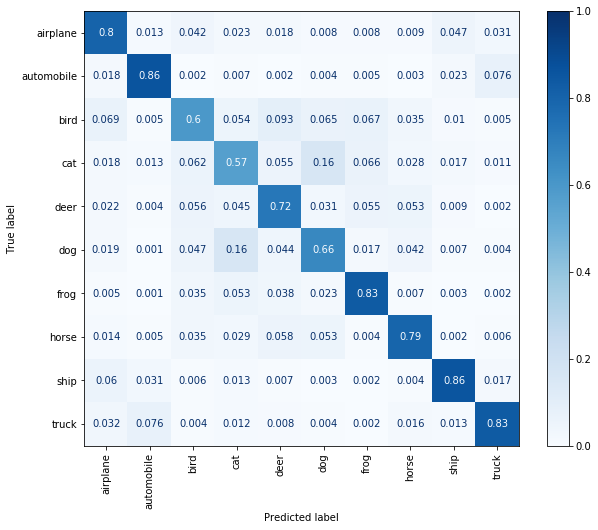

In [67]:
# plot_confusion_matrix(y_test, cnn_y_pred_set2)

10 randomly selected correctly predicted images


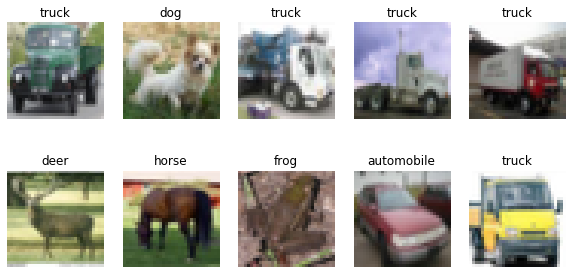

10 randomly selected incorrectly predicted images


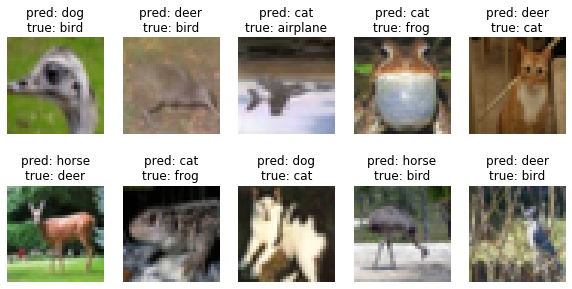

In [68]:
# plot_sample_images(X_test, y_test, cnn_y_pred_set2, correct=True)
# plot_sample_images(X_test, y_test, cnn_y_pred_set2, correct=False)

From the incorrectly predicted images below are some of the images explanations why the prediction was incorrect : 

Images = [row number, column number]

[2,3] = The model generally had the most missclassifications between a dog and cat as physically they have similar features.

[2,2] = It misspredicted a horse for a deer, as horses and deers also have similar features this may have confused the CNN model.

[1,3] = It is very strange that the CNN misspredicted an airplane as a cat, maybe because the photo was taken upside down this confused the CNN model.

[1,2] = It may have gotten this wrong prediction because it only shows a closeup of the birds face and the CNN was used to seeing the whole body of the bird.

The CNN model gave misspredictions if the photos was taken at an incorrect angle e.g. upside down and for similarly featured animals like cats & dogs and deer & horses. 


### Task (v) Structure Of Your Code

As per instructions in the Lab 5 Sheet the following pseudocode has been implemented in the code below :

if the MLP model subdirectory is present in the current directory :

    load the model

    display its architecture

    train for one epoch

    display the precision, recall, f1 class metrics

    display the confusion matrix

    display 10 correctly classified images and 10 incorrectly classified images

else

    set up the model and display its architecture

    train the model from scratch using the optimal hyperparameter values for 100 epochs

    test the model on the test set

    display the precision, recall, f1 class metrics

    display the confusion matrix

    display 10 correctly classified images and 10 incorrectly classified images


### Please note that all the functions above with "The function below NEEDS to be run" need to be run first before the code below can run.

This is the MLP model architecture, trained for 1 epoch, and performance metrics
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_23 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dropout_67 (Dropout)         (None, 3072)              0         
_________________________________________________________________
dense_67 (Dense)             (None, 256)               786688    
_________________________________________________________________
dropout_68 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_68 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_69 (Dropout)         (None, 128)               0         
______________________________________

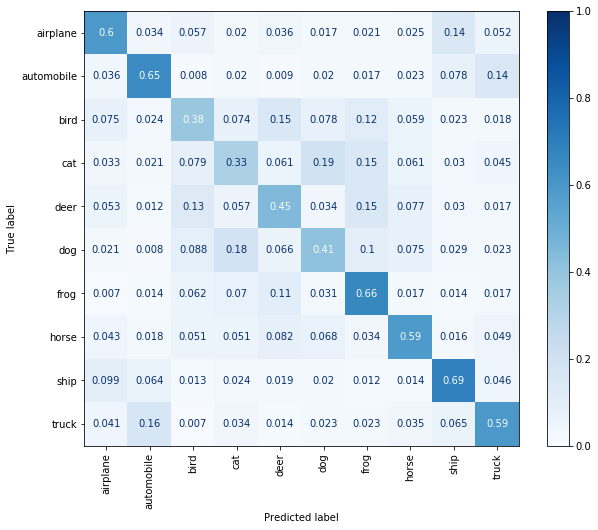

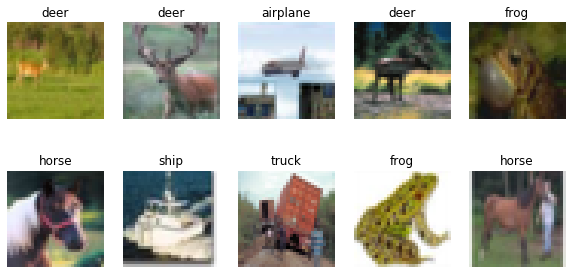

10 randomly selected incorrectly predicted images


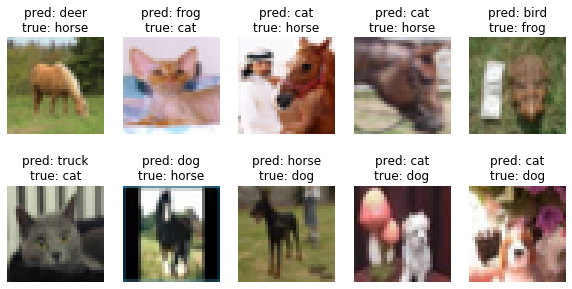

This is the CNN model architecture, trained for 1 epoch, and performance metrics
Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 32)        1568      
_________________________________________________________________
batch_normalization_14 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)        32832     
_________________________________________________________________
batch_normalization_15 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 8, 8, 64)          0         
______________________________________

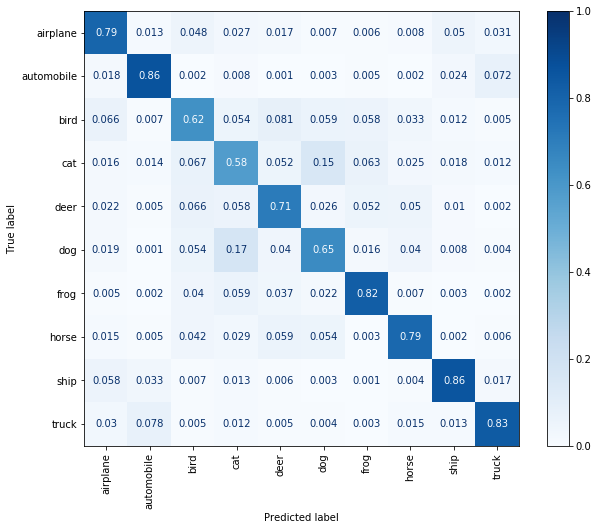

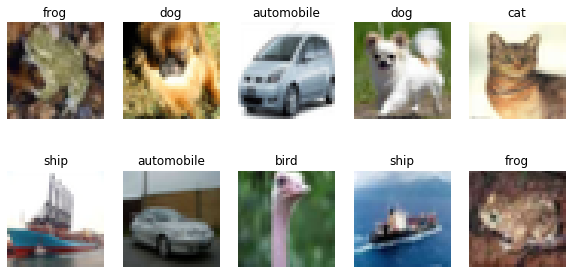

10 randomly selected incorrectly predicted images


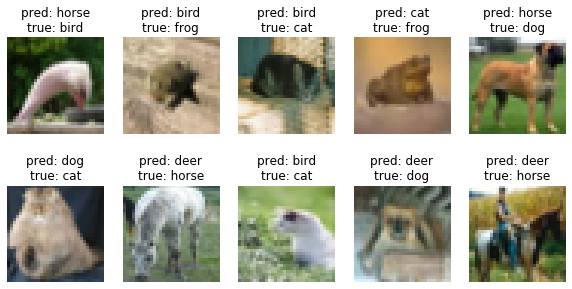

In [14]:
# The code below is for Task(v) with the pseudocode stated above.

# Run this code to produce the results for Task(v), there are already trained models in the directory folder and the code 
# below will run for 1 epoch for each MLP and CNN model, if the directory folder is removed then each model will run 
# for 100 epochs
import os.path
from os import path

if path.exists('Santosa_Daniel-MLP'):
    print("This is the MLP model architecture, trained for 1 epoch, and performance metrics")
    mlp_model = keras.models.load_model("Santosa_Daniel-MLP/") # roll back to best model
    mlp_model.summary()

    mlp_history = mlp_model.fit(X_train, y_train, epochs=1, validation_data=(X_val,y_val),
                            batch_size=32)
    
    # Print the training and accuracy of MLP model
    print(f"Accuracy: {mlp_model.evaluate(X_test, y_test, verbose=0)[1]:.4f}\n")
    mlp_y_pred_1epoch = np.array([np.argmax(x) for x in mlp_model.predict(X_test)])
    print("Per class precision and recall metrics:")
    print(sk.metrics.classification_report(y_test, mlp_y_pred_1epoch, target_names=class_names))
    plot_confusion_matrix(y_test, mlp_y_pred_1epoch)
    plot_sample_images(X_test, y_test, mlp_y_pred_1epoch, correct=True)
    plot_sample_images(X_test, y_test, mlp_y_pred_1epoch, correct=False)            
    
elif not path.exists('Santosa_Daniel-MLP'): 
    print("This is the MLP model architecture, trained for 100 epochs, and performance metrics")
    # these are the optimal MLP model hyperparameters from Setting 2
    # learning rate scheduler is constant below 10 epochs and exponential after 10 epochs with callback
    def scheduler(epoch, lr):
       if epoch < 10:
         return lr
       else:
         return lr * math.exp(-0.1)
    learning_schedule_cb = keras.callbacks.LearningRateScheduler(scheduler)

    cwi = 'glorot_uniform'
    ls = learning_schedule_cb
    dr = 0.05

    mlp_y_pred_100epoch = train_mlp_model(cwi, ls, dr)
    print("Per class precision and recall metrics:")
    print(sk.metrics.classification_report(y_test, mlp_y_pred_100epoch, target_names=class_names))
    plot_confusion_matrix(y_test, mlp_y_pred_100epoch)    
    plot_sample_images(X_test, y_test, mlp_y_pred_100epoch, correct=True)
    plot_sample_images(X_test, y_test, mlp_y_pred_100epoch, correct=False)
    
if path.exists('Santosa_Daniel-CNN'):
    print("This is the CNN model architecture, trained for 1 epoch, and performance metrics")
    cnn_model = keras.models.load_model("Santosa_Daniel-CNN/") # roll back to best model
    cnn_model.summary()
  
    # Fit and train the CNN model
    print("Training CNN network:")
    cnn_history = cnn_model.fit(X_train, y_train, epochs=1, validation_data=(X_val,y_val),
                                batch_size=64)
    print(f"Accuracy: {cnn_model.evaluate(X_test,y_test,verbose=0)[1]:.4f}")    
    # Print the training and accuracy of the CNN model
    cnn_y_pred_1epoch = np.array([np.argmax(x) for x in cnn_model.predict(X_test)])
    print("Per class precision and recall metrics:")
    print(sk.metrics.classification_report(y_test, cnn_y_pred_1epoch, target_names=class_names))    
    plot_confusion_matrix(y_test, cnn_y_pred_1epoch)
    
    plot_sample_images(X_test, y_test, cnn_y_pred_1epoch, correct=True)
    plot_sample_images(X_test, y_test, cnn_y_pred_1epoch, correct=False) 
    
elif not path.exists('Santosa_Daniel-CNN'): 
    print("This is the CNN model architecture, trained for 100 epochs, and performance metrics")
    # These are the optimal CNN hyperparameter setting for setting 2
    kernels = 64
    kernel_size = 4
    activation_function = 'selu'

    cnn_y_pred_100epoch = train_cnn_model(kernel_size, kernels, activation_function) 
    print("Per class precision and recall metrics:")
    print(sk.metrics.classification_report(y_test, cnn_y_pred_100epoch, target_names=class_names))
    plot_confusion_matrix(y_test, cnn_y_pred_100epoch)
    plot_sample_images(X_test, y_test, cnn_y_pred_100epoch, correct=True)
    plot_sample_images(X_test, y_test, cnn_y_pred_100epoch, correct=False) 

### MLP & CNN Comparison & Summary

#### Classification Accuracies

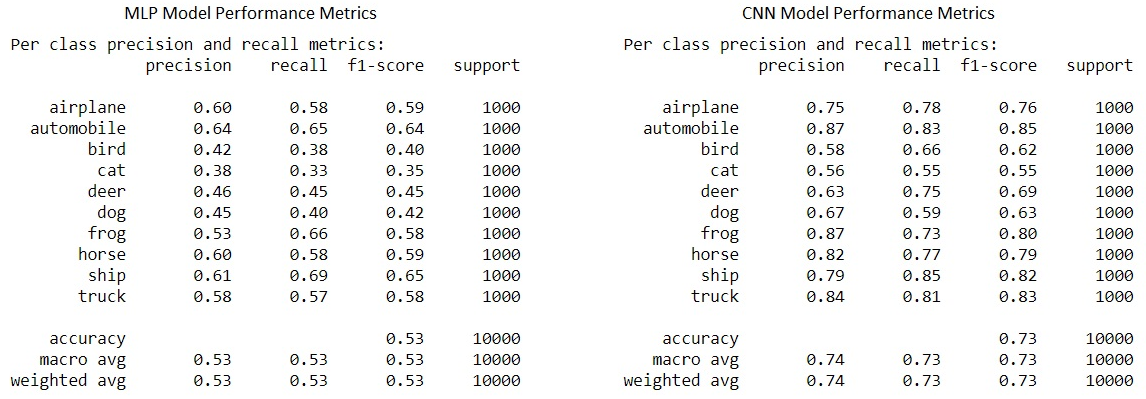

The CNN model has a better prediction accuracy of 73% compared with the MLP model at 53%. 

The CNN model had the best precision of 0.87, recall of 0.83, and f1 score of 0.85 for automobiles. The MLP model also had the best precision of 0.64, recall of 0.65, and f1 score of 0.64 for automobiles. Both models found it easiest to classify automobiles.

Both models had the worse performance metric scores for the cat class and second being the bird class. In general the models found it more difficult to classify animals than objects, this may be due because animals such as cats have less straightline/ straightedge features than objects like cars, ships, etc. and it is more difficult to distinguish non straightline features.

#### Confusion Matrices

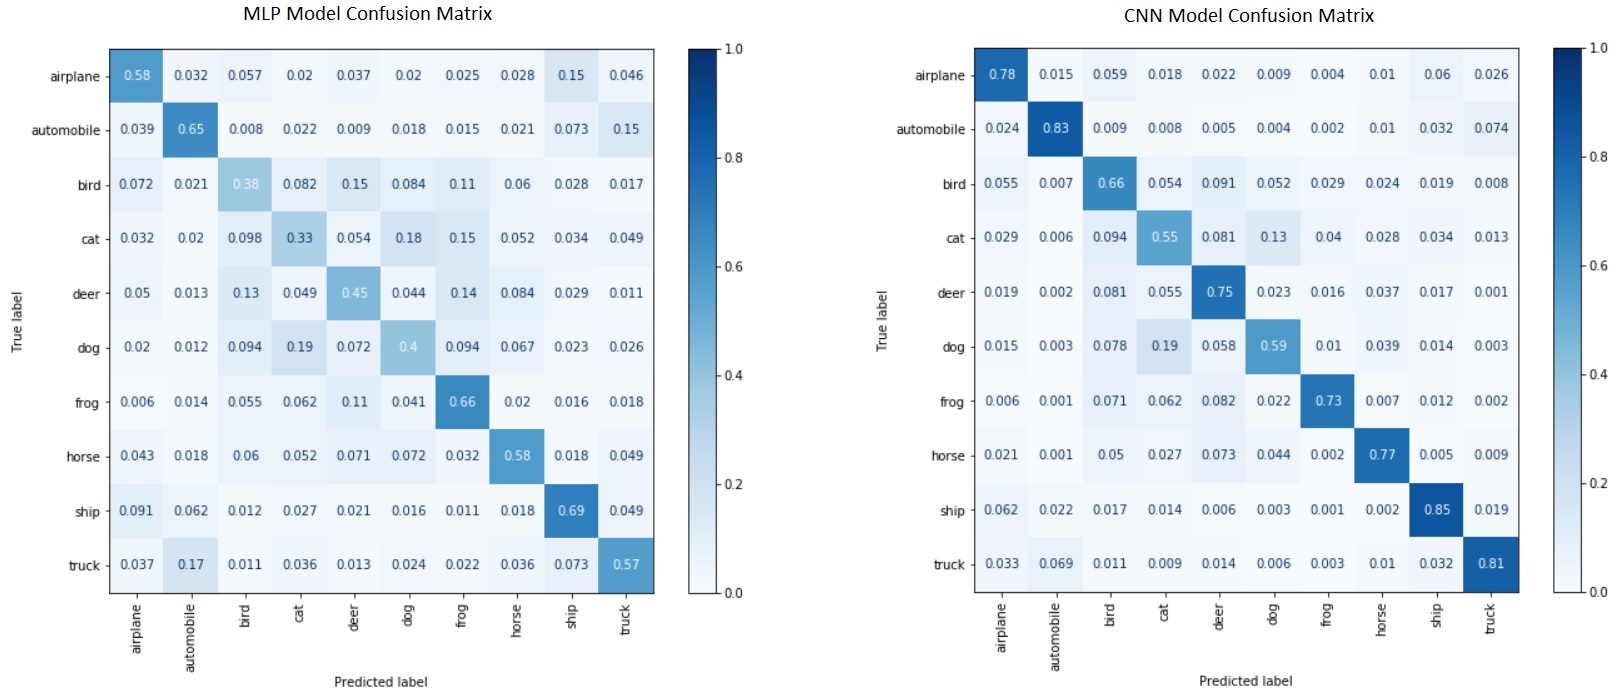

The CNN model performed better in the confusion matrix compared with the MLP model. 

For both models the common highest missclassification was between dogs and cats. This might be due to the general shape of cats and dogs being similar ie they both have 2 eyes, 2 ears, a nose, a mouth, 4 legs, are both furry, etc. 

The CNN model in general had less missclassifications than the MLP model. In general the models had better predictions with objects such as ships and trucks in general than animals. Although even for classifying objects the MLP model found it difficult to distinguish between an automobile and a truck and also between an airplane and a ship while the CNN model was better able to distinguish and had no problems for these objects.



#### Network Architectures
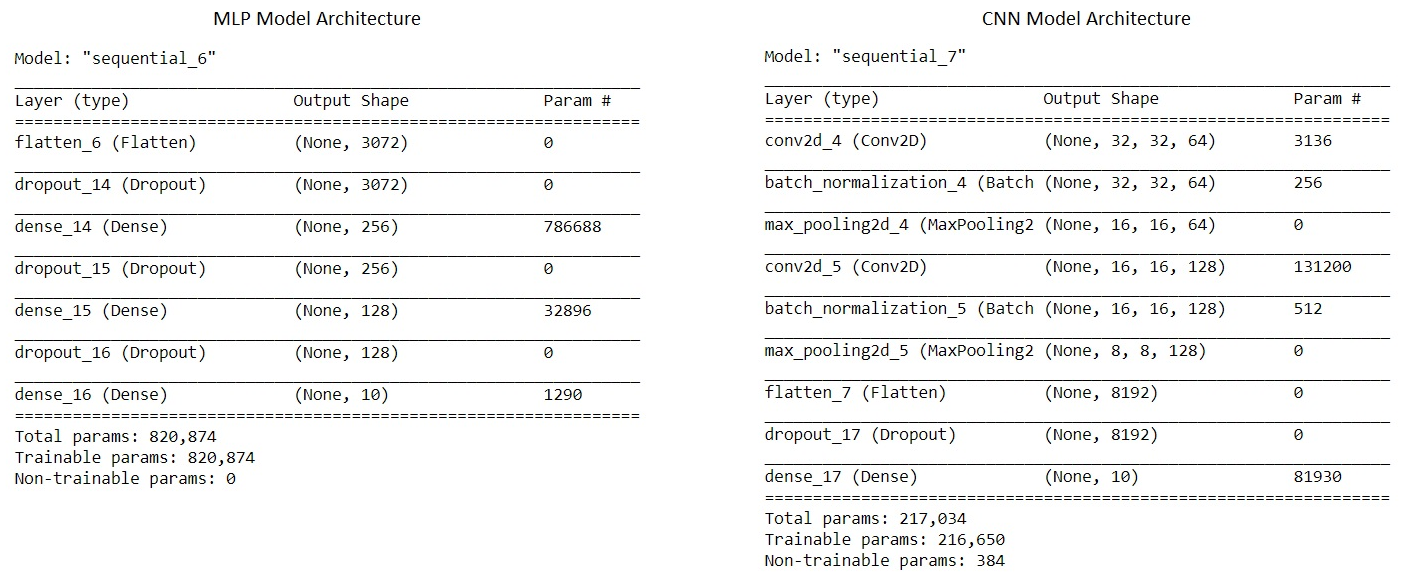

The CNN model was a deeper network than the MLP model, however, it has less trainable parameters because the trainable kernels are not fully connected between layers but only to the pixels in their receptive fields. Although there were a large number of trainable kernel pixels it was still less than the number of trainable perceptrons in the MLP model. The CNN model also has less perceptrons than the MLP model because unlike the MLP model which contains perceptrons throughout the network for each layer, the CNN only has 10 perceptrons in the final output layer of the network for each of the 10 classes.
Although the number of trainable parameters was less for the CNN model it requires more computations with all the convolutional calculations the kernels work on for each layer. Pooling helps in reducing the amount of computations for a CNN model.

As the amount of computations and RAM requirements for the CNN model are larger than the MLP model, the CNN model also took longer to train for each epoch and batch size than the MLP model.


#### Examples Of Prediction Classes For Each Model

In [33]:
# function to get random image with both MLP and CNN model predictions correct
def get_rand_image_pred2(x, y_true, y_pred, y_pred2, correct=True):
    i = random.randint(0,len(x)-1)
    if ((y_true[i] == y_pred[i]) and (y_true[i] == y_pred2[i])) == correct:
        return (x[i], y_true[i], y_pred[i], y_pred2[i])
    else:
        return get_rand_image_pred(x, y_true, y_pred, y_pred2, correct)

# function to plot random image predictions for MLP and CNN models
def plot_sample_images2(X_test, y_test, y_pred,y_pred2,
                       correct=True, rows=2, cols=5, figsize=(10,5)):
    correctly = "correctly" if correct else "incorrectly"
    print(f"{rows * cols} randomly selected images with MLP and CNN model predictions")
    plt.figure(figsize=figsize)
    for i in range(rows * cols):
        image, tclass, pclass, pclass2 = get_rand_image_pred2(X_test, y_test, y_pred, y_pred2, correct)
        ax = plt.subplot(rows,cols,i+1)
        plt.imshow(image)
        plt.axis('off')
        if correct:
            ax.set_title(f"MLP: {class_names[pclass]}\nCNN: {class_names[pclass2]}")
        else:
            ax.set_title(f"MLP: {class_names[pclass]}\nCNN: {class_names[pclass2]}\ntrue: {class_names[tclass]}")
    plt.show()

10 randomly selected images with MLP and CNN model predictions


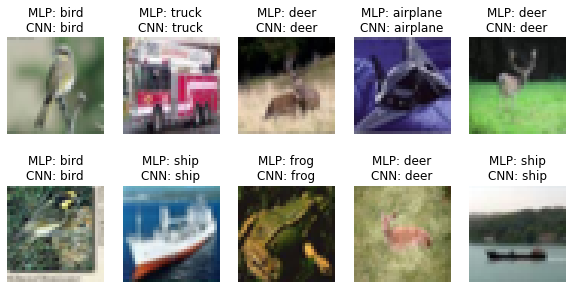

In [32]:
# plot_sample_images(X_test, y_test, mlp_y_pred_1epoch, cnn_y_pred_1epoch, correct=True)

Here are examples where both MLP and CNN models have correct predictions.

10 randomly selected images with MLP and CNN model predictions


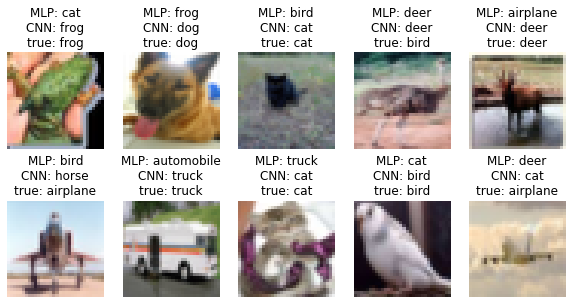

In [30]:
# plot_sample_images(X_test, y_test, mlp_y_pred_1epoch, cnn_y_pred_1epoch, correct=False)

Here are some examples where CNN predicted correctly and both predicted incorrectly.

Images = [row number, column number]

[1,1] , [1,2] , [1,3] , [1,5] , [2,2] , [2,3] = CNN predicted correctly, MLP predicted incorrectly

[1,4] , [2,1] , [2,5] = Both MLP and CNN predicted incorrectly.
